<a href="https://colab.research.google.com/github/mr-pr0fessional/MINI-PROJECT/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required packages

In [44]:
!pip install xgboost

Importing Dependencies

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Wine Quality Data Set

In [46]:
def load_data():
    # Downloaded from UCI repository
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    df = pd.read_csv(url, sep=';')
    return df

In [47]:
def preprocess_data(df):
    # Basic information about the dataset
    print("Dataset Info:")
    print(df.info())
    print("\nFirst few rows of the dataset:")
    display(df.head())

    # Separate features and target
    X = df.drop('quality', axis=1)
    y = df['quality']

    # Fix for XGBoost: Adjust target labels to be 0-indexed
    # XGBoost expects integer labels starting from 0. The original quality scores are 3-8.
    # Subtract the minimum quality score to make the labels 0-indexed.
    min_quality = y.min()
    y = y - min_quality
    # Verify the new unique labels
    print(f"\nAdjusted unique target labels: {y.unique()}")


    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

Model Training and Evaluation

In [48]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'XGBoost': XGBClassifier(random_state=42)
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Training {name}...")
        model.fit(X_train, y_train)

        # Makeing predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'predictions': y_pred,
            'classification_report': classification_report(y_test, y_pred)
        }

        print(f"\n{name} Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(results[name]['classification_report'])

        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    return results


In [49]:
# Feature Importance Plotting
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title('Feature Importances')
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.show()
    elif hasattr(model, 'get_booster'):
         booster = model.get_booster()
         importances = booster.get_score(importance_type='weight')
         feature_importances = pd.DataFrame.from_dict(importances, orient='index', columns=['importance'])
         feature_importances = feature_importances.sort_values(by='importance', ascending=False)

         plt.figure(figsize=(10, 6))
         plt.title('Feature Importances')
         sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
         plt.xticks(rotation=45, ha='right')
         plt.tight_layout()
         plt.show()


 Main Execution

Loading and preprocessing data...
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

First few rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Adjusted unique target labels: [2 3 4 1 5 0]

Training and evaluating models...

Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Accuracy: 0.6594

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.71      0.74      0.72       130
           3       0.63      0.70      0.66       132
           4       0.64      0.55      0.59        42
           5       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



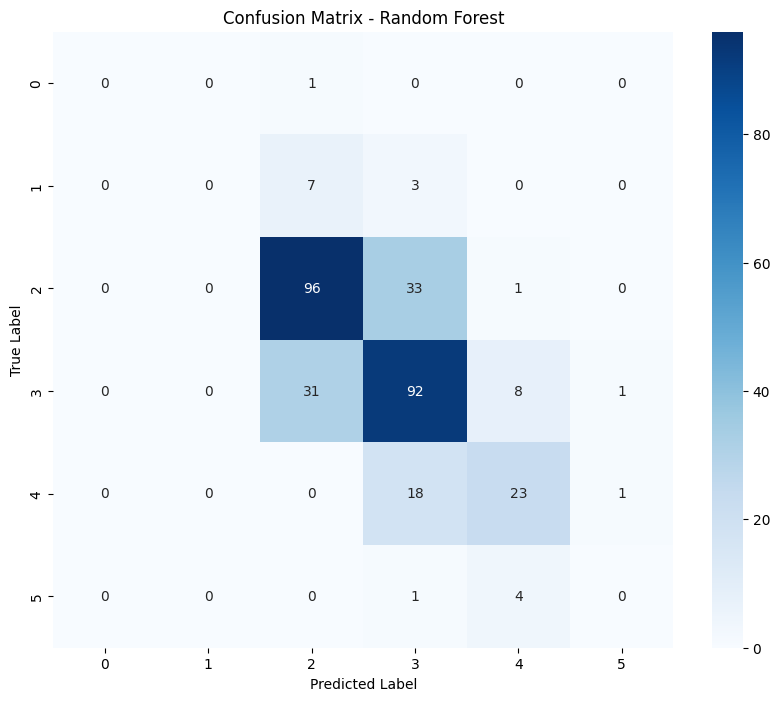


Training SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM Accuracy: 0.6031

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.65      0.76      0.70       130
           3       0.56      0.64      0.60       132
           4       0.56      0.21      0.31        42
           5       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.30      0.27      0.27       320
weighted avg       0.57      0.60      0.57       320



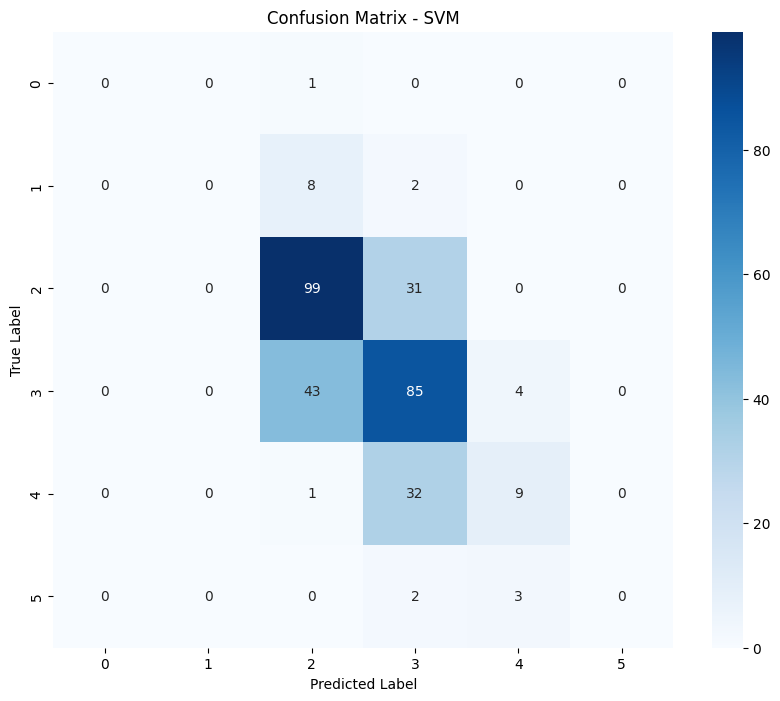


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



XGBoost Accuracy: 0.6969

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.75      0.80      0.78       130
           3       0.68      0.73      0.70       132
           4       0.64      0.55      0.59        42
           5       0.00      0.00      0.00         5

    accuracy                           0.70       320
   macro avg       0.34      0.35      0.34       320
weighted avg       0.67      0.70      0.68       320



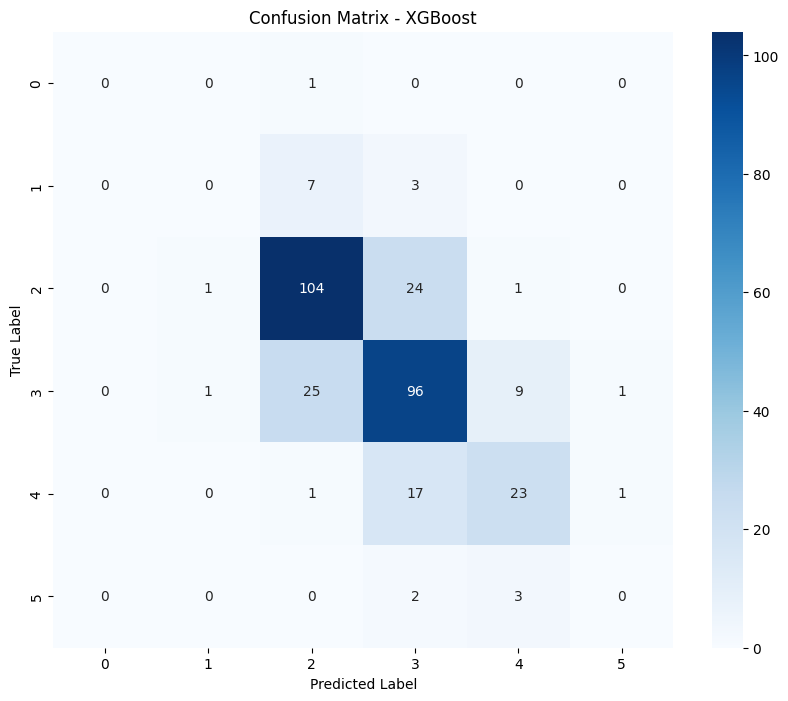


Final Model Comparison:
Random Forest: 0.6594
SVM: 0.6031
XGBoost: 0.6969

Feature Importance Analysis:


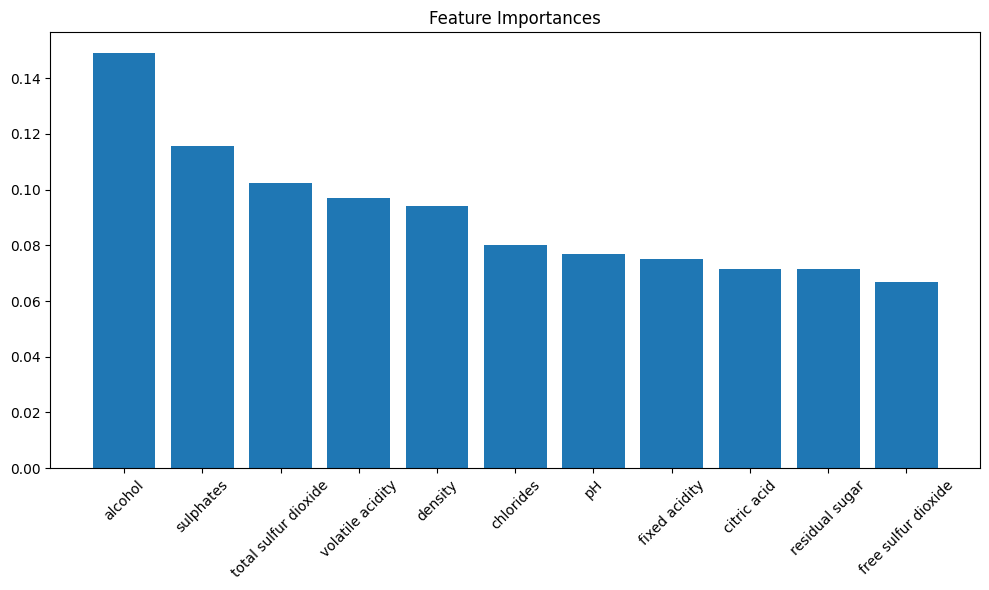

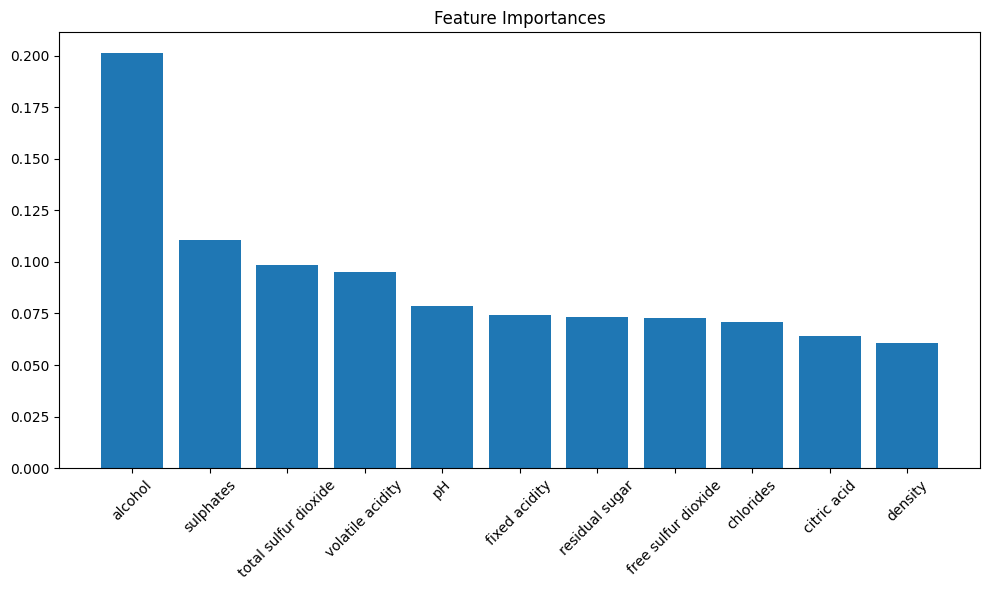

In [50]:
def main():
    # Load and preprocess data
    print("Loading and preprocessing data...")
    df = load_data()
    X_train, X_test, y_train, y_test = preprocess_data(df)

    # Train and evaluate models
    print("\nTraining and evaluating models...")
    results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Print final comparison
    print("\nFinal Model Comparison:")
    for name, result in results.items():
        print(f"{name}: {result['accuracy']:.4f}")

    # Plot feature importance for Random Forest and XGBoost
    feature_names = df.drop('quality', axis=1).columns
    print("\nFeature Importance Analysis:")
    plot_feature_importance(results['Random Forest']['model'], feature_names)
    plot_feature_importance(results['XGBoost']['model'], feature_names)

# Run the main function
if __name__ == "__main__":
    main()
